# Final Handoff: Global Temperature Analysis  
**Data Source:** Global historical land-surface temperatures, 1743–2013  

This notebook provides a consolidated analysis of global temperature data, from initial exploration through modeling and forecasting. It is designed as a complete "handoff" for teammates, ensuring that all major steps, findings, and supporting evidence are captured in one place.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
from IPython.display import Image, display

## 1. Data Overview
We work primarily with three datasets:  
- **GlobalTemp_Cleaned_CountryContinent.csv** — master dataset (1743–2013).  
- **GlobalTemp_Post1850.csv** — trimmed dataset (post-1850).  
- **Annual_Anomalies.csv** — annual anomalies vs baseline (1951–1980).  

**Coverage:** The cleaned dataset spans from **1743 through 2013** (270 years).  

> **Note on datasets used:**  
> While the master dataset spans **1743–2013**, many analyses are restricted to **post-1850** for reliability.  
> In some cases (e.g., regression slopes, forecasting), we further limited to **post-1900** to reduce noise from sparse early records.  
> This approach balances historical coverage with stability, ensuring that conclusions are not distorted by early gaps in the data.  


In [4]:
df_clean = pd.read_csv("handoff_outputs/data/GlobalTemp_Cleaned_CountryContinent.csv")
df_post1850 = pd.read_csv("handoff_outputs/data/GlobalTemp_Post1850.csv")
df_annual = pd.read_csv("handoff_outputs/data/Annual_Anomalies.csv")

print(df_clean.shape, df_post1850.shape, df_annual.shape)
df_annual.head()

(518357, 10) (432933, 10) (1107, 7)


,Year,Continent,AverageTemperature,BaselineTemp,Anomaly,RollingAnomaly,RollingAnomaly5
0,1850,Africa,23.658880,23.797806,-0.138926,NaN,NaN
1,1850,Asia,17.570744,19.041540,-1.470796,NaN,NaN
2,1850,Europe,7.063718,7.791308,-0.727591,NaN,NaN
3,1850,North America,22.644729,23.573991,-0.929263,NaN,NaN
4,1850,South America,24.934958,20.602387,4.332571,NaN,NaN


---

## 2. Warming Rates (Full vs Post-1900)

We compared regression slopes under two scenarios:  
1. **Full dataset (1743–2013)**  
2. **Post-1900 subset**  

This allowed us to see how early, noisier records affect estimates of long-term warming.

### Continental Slopes
The table below summarizes slope estimates (°C per century) for each continent.  
It highlights how early data can distort results (e.g., Oceania and South America), while post-1900 slopes give a more reliable picture of warming rates.

**Key Takeaways:**  
- Oceania’s full-period slope is extreme due to patchy early records but stabilizes post-1900.  
- South America looks artificially flat before 1900 but shows clear warming afterward.  
- Antarctica has the steepest post-1900 trend (~1.67 °C/century).  
- Overall, post-1900 results are more balanced and consistent across regions.  


In [7]:
slopes = pd.read_csv("handoff_outputs/tables/warming_slopes_compare.csv")
slopes

,Continent,Slope_Full,Slope_Post1900
0,Africa,0.85,0.51
1,Antarctica,1.28,1.67
2,Asia,1.28,1.14
3,Europe,0.83,1.06
4,North America,0.94,1.04
5,Oceania,3.87,1.06
6,South America,0.29,0.94


---

## 3. Forecasting (ARIMA vs Prophet)

We forecasted anomalies per continent using both **ARIMA** and **Prophet** models.  
Prophet generally captured upward trends more reliably, while ARIMA sometimes underfit (flattened) the trajectory.

Below we show:  
1. An example **Europe Prophet Forecast** plot.  
2. The **RMSE comparison** across all continents, showing where Prophet or ARIMA performed better.


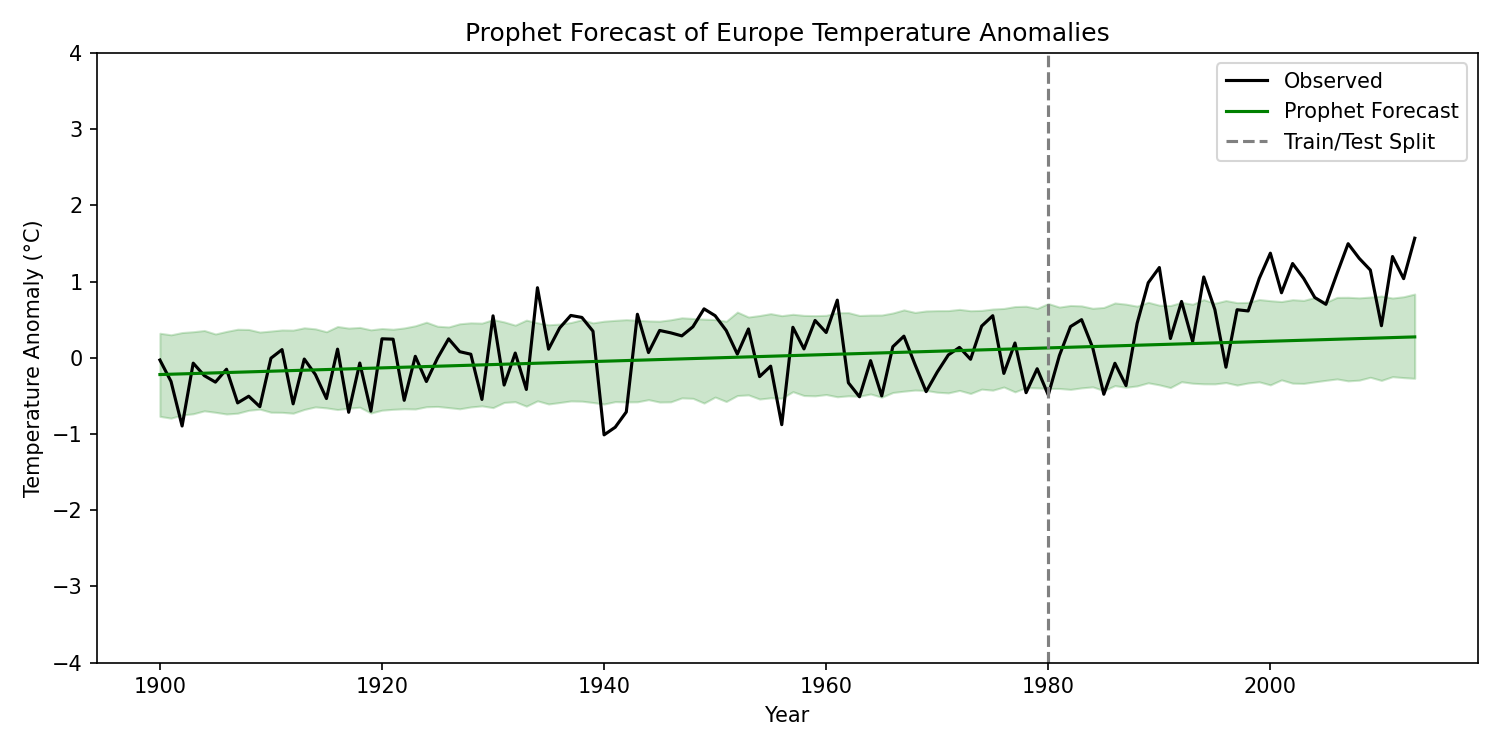

,Continent,ARIMA_RMSE,Prophet_RMSE,Better_Model
0,Africa,0.347,0.511,ARIMA
1,Antarctica,0.492,0.212,Prophet
2,Asia,0.500,0.448,Prophet
3,Europe,1.307,0.711,Prophet
4,North America,0.285,0.287,ARIMA
5,Oceania,0.229,0.144,Prophet
6,South America,0.235,0.228,Prophet


In [10]:
display(Image(filename="handoff_outputs/plots/forecast_prophet_continents/prophet_Europe.png"))
pd.read_csv("handoff_outputs/tables/rmse_compare.csv")

**Observation:**  
Prophet generally followed the rising anomaly trends more closely than ARIMA, but in Europe, Africa, and Asia the observed anomalies rose above Prophet’s forecast confidence band.  
This shows the model underestimates some short-term volatility even while capturing the long-term upward trajectory.  

**Broader Insight:**  
These overshoots suggest that recent warming may be accelerating faster than models trained only on the past century predict.  
The implication is that while statistical forecasts highlight clear warming, the reality on the ground points to an even sharper intensification of global temperature rise.  


---

## 4. Seasonal Patterns

To better understand how temperature varies within each year, we examined **seasonal mean temperatures** across continents.  
Instead of anomalies, these plots show the raw seasonal averages, which makes the differences between equatorial and continental climates easier to see.


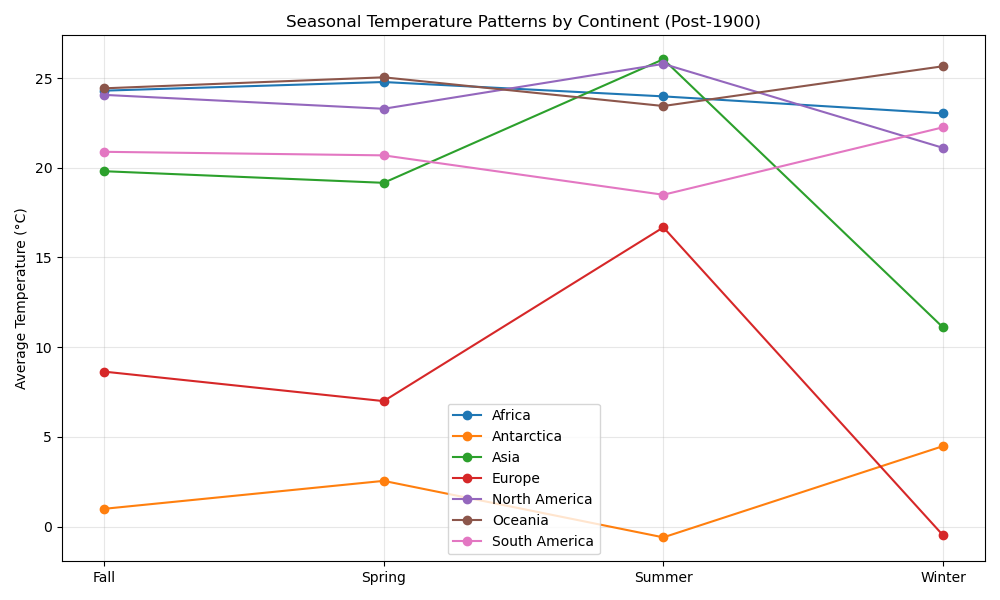

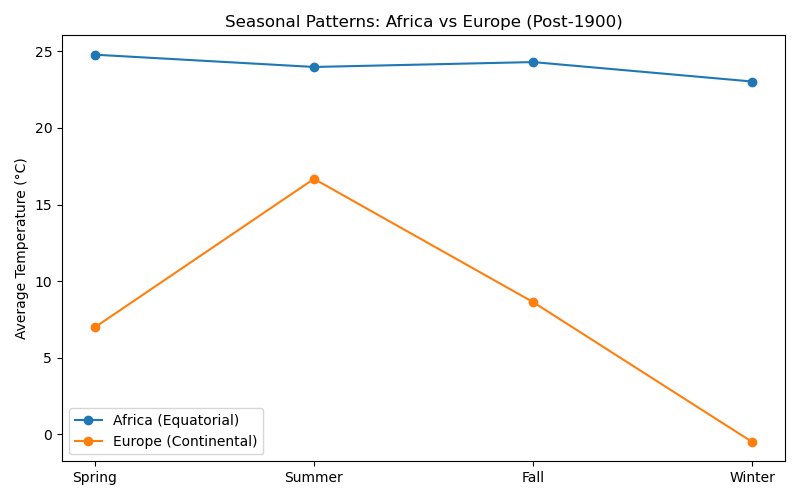

In [14]:
display(Image(filename="handoff_outputs/plots/seasonal_patterns_all_continents.png"))
display(Image(filename="handoff_outputs/plots/seasonal_patterns_africa_europe.png"))

**Observation & Key Takeaways:**  
- **All Continents:** Continental regions (e.g., Europe, Asia) show strong contrasts between summer and winter.  
- **Africa vs Europe:** Equatorial Africa remains relatively stable across seasons, while Europe swings widely between warm summers and cold winters.  
- **Overall Insight:** Seasonal variation is stronger in higher-latitude continents, while equatorial regions stay comparatively stable. This helps contextualize the uneven impacts of warming — temperate regions see amplified volatility, while equatorial zones experience steady baseline increases.  


---

## 5. Decadal Patterns

To smooth out year-to-year noise, we examined **decadal averages and volatility** of anomalies.  
Looking across decades helps highlight long-term shifts while still capturing unusual spikes that may point toward major climate events (e.g., volcanic eruptions, El Niño/La Niña).


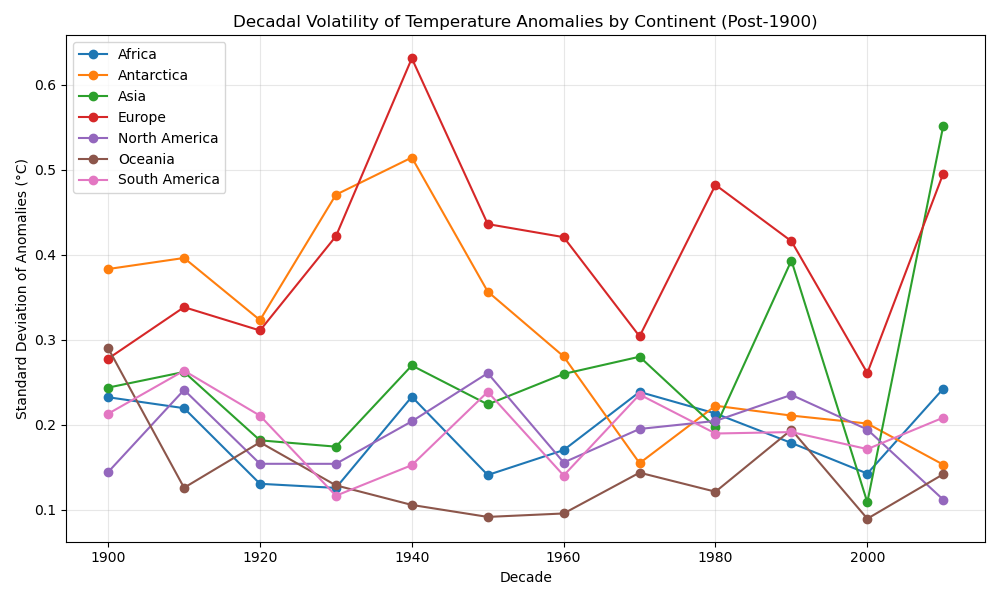

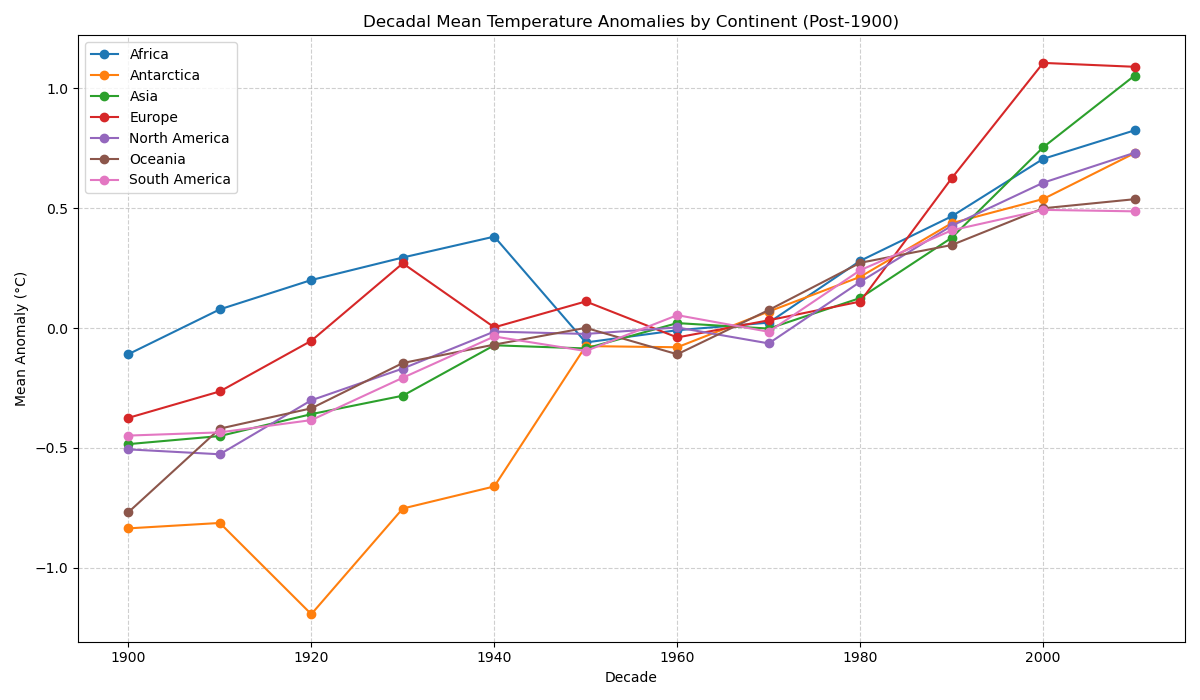

In [18]:
display(Image(filename="handoff_outputs/plots/decadal_volatility.png"))
display(Image(filename="handoff_outputs/plots/decadal_mean_anomalies.png"))

### Observations  
- The **decadal mean anomalies** plot shows a steady upward trajectory across nearly all continents post-1900, with Europe and Asia leading the rise in recent decades.  
- The **volatility plot** reveals certain decades where temperature swings were much larger — especially in Europe and Antarctica around the mid-20th century. These spikes likely point to climate events (natural variability, volcanic activity, or shifts in measurement coverage).  

### Key Takeaway  
The combination of rising decadal means and volatility spikes emphasizes that warming is not a smooth, linear process. Instead, continents experience uneven patterns, where periods of relative stability are punctuated by sharp shifts. This unevenness provides an important bridge into both forecasting models and climate storytelling.  

---

## 6. Final Takeaways  

- **Uneven warming:** Antarctica and Asia warm fastest; Africa and South America slower but rising.  
- **Forecasts:** Prophet captured trends better than ARIMA, but both show consistent upward anomalies.  
- **Seasonal differences:** Continental climates show stronger cycles than equatorial ones.  
- **Decadal volatility:** Event-driven spikes are visible, but long-term warming dominates.  


---

## 7. Methods Contribution and Applied Data Science Elements  

While much of this project focused on cleaning, exploring, and visualizing global temperature data, we also incorporated several **applied data science techniques** that extend beyond descriptive charts:  

- **Comparative Trend Analysis**  
  - Measured and compared warming slopes for each continent using regression, both on the full dataset and the post-1900 subset.  
  - This gave us evidence of uneven warming across regions and showed how conclusions shift depending on dataset scope.  
- **Volatility and Anomaly Detection**  
  - Calculated decadal standard deviations to highlight regions and decades with greater volatility.  
- **Predictive Forecasting Models**  
  - Implemented ARIMA and Prophet models to forecast continental temperature anomalies.  
  - Evaluated performance with RMSE, which allowed us to compare traditional statistical models to more flexible time-series approaches.  
  - Noted instances where observed anomalies exceeded model confidence bands — evidence that current warming trends may be outpacing even model predictions.  

✅ This handoff now covers **EDA, regression modeling, and forecasting** with supporting evidence, setting up the visualization teammate for effective storytelling.  
